# Capstone Project: Lotka-Volterra Simulation
##### Presented By Sandhya Nayar and Pranav Putta

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as ip

## Lotka-Volterra Equations 
Lotka-Volterra equations can be used to simulate population dynamics. In this project, we will be simulating specifically predator-prey populations. 

### The Lotka Volterra Predator-Prey Equation: 

$ \frac{dx}{dt} = \alpha x - \beta xy $


$ \frac{dy}{dt} = \delta xy - \gamma y $

,where $\alpha$ is equal to the reproduction rate of the prey, $\beta$ is equal to the rate of predation of the predator on the prey, $\delta$ is equal to the reproduction rate of the predator, and $\gamma\$ is equal to the natural death rate of the predator. 


###  Predator Prey Example Graph : Brown Bears and River Salmon
We assume that the starting population of the salmon is 20 and the bears is 2. 
We used the following population parameters:

The salmon's rate of reproduction was 1.1 .
The rate of predation of the bear on the salmon was 0.4 .
The bear's rate of reproduction was 0.1 
The natural death rate of the bear was 0.4. 

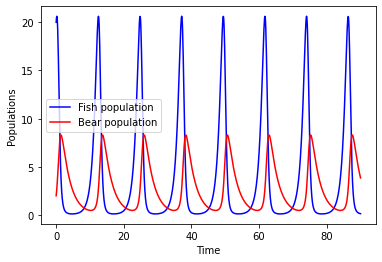

In [9]:
start = [20, 2] #starting populations [salmon, bears]
t = np.linspace(0,90,num=1000)

#data from 
alpha = 1.1
beta = 0.4
delta = 0.1
gamma = 0.4

params = [alpha, beta, delta, gamma]

def sim(start, t, params):
    #prey population start
    x = start[0]
    #predator population start
    y = start[1]
    
    #parameter initialization
    alpha = params[0]
    beta = params[1]
    delta = params[2]
    gamma = params[3]
    
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    
    return ([dxdt, dydt])

y = odeint(sim, start, t, args=(params,))
f, ax1 = plt.subplots(1)
line1, = ax1.plot(t,y[:,0], color="b", label = "Fish population")
line2, = ax1.plot(t,y[:,1], color="r", label = "Bear population")
ax1.set_ylabel("Populations")
ax1.set_xlabel("Time")
plt.legend()
plt.show()

# Predator Prey Live Graph
Choose from 3 different predator-prey sets to model using Lotka Volterra:

    Canadian Hare and Lynx
    White-Tailed Deer and Grey Wolf
    Red Fox and European Rabbit

In [7]:
#user input 
def user_input():
    check = False
    while(check == False):
        print("Menu:\n")
        print("\t 1. Canadian Hare and Lynx\n \t 2. White-Tailed Deer and Grey Wolf \n \t 3. Red Fox and European Rabbit\n")
        user = input("What type of species do you want to model? [1, 2, 3]: ")
        user = int(user)
        check = check_input(user)
        if check:
            if user == 1:
                species = [[20, 30],[1.6, 3.2, 1.92, 0.56]]
            elif user == 2:
                species = [[4,2], [ 1, 1, 1, 0.75]]
            else:
                species = [[4,3], [ 1,0.1,1.5,0.75]]   
    return species
            

def check_input(x):
    x = int(x)
    if x == 1 or x == 2 or x == 3:
        return True
    else:
        print("\nPlease enter a valid number from 1-3.\n")
        return False


Menu:

	 1. Canadian Hare and Lynx
 	 2. White-Tailed Deer and Grey Wolf 
 	 3. Red Fox and European Rabbit

What type of species do you want to model? [1, 2, 3]: 1


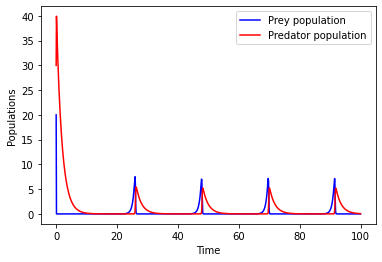

In [8]:
s, par = user_input()
t = np.linspace(0,100,num=1000)
b = odeint(sim, s, t, args=(par,))
f, ax1 = plt.subplots(1)
line1, = ax1.plot(t,b[:,0], color="b", label = "Prey population")
line2, = ax1.plot(t,b[:,1], color="r", label = "Predator population")
ax1.set_ylabel("Populations")
ax1.set_xlabel("Time")
plt.legend()
plt.show()